In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

In [3]:
df=pd.read_csv('D:/Data Science Datasets/Black Friday Sale/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df['area_type']=df['area_type'].map({'Super built-up  Area':1,'Built-up  Area':2,'Plot  Area':3,'Carpet  Area':4})

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,3,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,1,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,1,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  int64  
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 936.7+ KB


In [10]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Dec               1
16-Nov               1
17-Jan               1
15-Aug               1
14-Nov               1
Name: availability, Length: 81, dtype: int64

In [11]:
df['location'].value_counts()

Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
Chickpet                 1
Chikkabettahalli         1
Goraguntepalya           1
Bennigana Halli          1
CQAL LAYOUT C BLOCK      1
Name: location, Length: 1305, dtype: int64

In [12]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
13 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
43 Bedroom       1
27 BHK           1
14 BHK           1
12 Bedroom       1
Name: size, dtype: int64

In [13]:
df['size'].fillna(df['size'].mode()[0],inplace=True)

In [14]:
df['size'].isnull().sum()

0

In [15]:
df.shape

(13320, 9)

In [16]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
# df['size'].split(' ')[0]
df['bhk'] = df['size'][df['size'].notnull()].apply(lambda x: int(x.split(' ')[0]))

In [18]:
df.drop('size',axis=1,inplace=True)

In [19]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,1,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,3,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,2,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,1,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,1,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,2,Ready To Move,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5
13316,1,Ready To Move,Richards Town,NaN,3600,5.0,NaN,400.00,4
13317,2,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2
13318,1,18-Jun,Padmanabhanagar,SollyCl,4689,4.0,1.0,488.00,4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  int64  
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
 8   bhk           13320 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 936.7+ KB


In [21]:
df['total_sqft'].value_counts()

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
1053.4           1
2232             1
1049             1
1140 - 1250      1
5656             1
Name: total_sqft, Length: 2117, dtype: int64

### 1. Our area_type column is now converted to int
### 2. Our Availabilty,society and location column is not helpful here since it is a continous feature and cannot be encoded.

In [22]:
df.drop(['availability','society','location'],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  int64  
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 624.5+ KB


In [24]:
df.dtypes

area_type       int64
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,total_sqft,bath,balcony,price,bhk
30,1,2100 - 2850,4.0,0.0,186.000,4
56,2,3010 - 3410,NaN,NaN,192.000,4
81,2,2957 - 3450,NaN,NaN,224.500,4
122,1,3067 - 8156,4.0,0.0,477.000,4
137,1,1042 - 1105,2.0,0.0,54.005,2
165,1,1145 - 1340,2.0,0.0,43.490,2
188,1,1015 - 1540,2.0,0.0,56.800,2
224,1,1520 - 1740,NaN,NaN,74.820,3
410,1,34.46Sq. Meter,1.0,0.0,18.500,1
549,1,1195 - 1440,2.0,0.0,63.770,2


### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [27]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [28]:
df2 = df.copy()
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)
df2 = df2[df2.total_sqft.notnull()]
df2.head(2)

,area_type,total_sqft,bath,balcony,price,bhk
0,1,1056.0,2.0,1.0,39.07,2
1,3,2600.0,5.0,3.0,120.00,4


In [29]:
df2.isnull().sum()

area_type       0
total_sqft      0
bath           73
balcony       605
price           0
bhk             0
dtype: int64

In [30]:
df2.head()

,area_type,total_sqft,bath,balcony,price,bhk
0,1,1056.0,2.0,1.0,39.07,2
1,3,2600.0,5.0,3.0,120.00,4
2,2,1440.0,2.0,3.0,62.00,3
3,1,1521.0,3.0,1.0,95.00,3
4,1,1200.0,2.0,1.0,51.00,2


In [31]:
df2['balcony'].value_counts()

2.0    5101
1.0    4880
3.0    1669
0.0    1019
Name: balcony, dtype: int64

In [32]:
df2.shape

(13274, 6)

In [33]:
df2.dropna(inplace=True)

In [34]:
df2.shape

(12669, 6)

In [35]:
df2.isnull().sum()

area_type     0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [36]:
df2 = df2.astype({'balcony':'int32','bath':'int32'})

In [37]:
df2.head()

,area_type,total_sqft,bath,balcony,price,bhk
0,1,1056.0,2,1,39.07,2
1,3,2600.0,5,3,120.00,4
2,2,1440.0,2,3,62.00,3
3,1,1521.0,3,1,95.00,3
4,1,1200.0,2,1,51.00,2


In [38]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']

In [39]:
df2.head()

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1,1056.0,2,1,39.07,2,3699.810606
1,3,2600.0,5,3,120.00,4,4615.384615
2,2,1440.0,2,3,62.00,3,4305.555556
3,1,1521.0,3,1,95.00,3,6245.890861
4,1,1200.0,2,1,51.00,2,4250.000000


In [40]:
df2.describe()

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12669.000000,12669.000000,12669.000000,12669.000000,12669.000000,12669.000000,1.266900e+04
mean,1.487568,1511.842126,2.616308,1.585682,105.951073,2.736443,6.876159e+03
std,0.758558,1162.051672,1.223838,0.816734,131.808053,1.202598,2.263265e+04
min,1.000000,5.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1.000000,1100.000000,2.000000,1.000000,49.020000,2.000000,4.242820e+03
50%,1.000000,1260.000000,2.000000,2.000000,70.000000,3.000000,5.376344e+03
75%,2.000000,1640.000000,3.000000,2.000000,115.000000,3.000000,7.142857e+03
max,4.000000,52272.000000,40.000000,3.000000,2912.000000,43.000000,2.300000e+06


# Outlier Removal Using Business Logic

### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [41]:
df2[df2['total_sqft']/df2['bhk']<300].head()

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,3,1407.0,4,1,150.0,6,10660.980810
68,3,1350.0,7,0,85.0,8,6296.296296
70,3,500.0,3,2,100.0,3,20000.000000
78,2,460.0,1,0,22.0,2,4782.608696
89,3,710.0,6,3,160.0,6,22535.211268


In [42]:
df2.shape

(12669, 7)

In [43]:
df2=df2[~(df2['total_sqft']/df2['bhk']<300)]

In [44]:
df2

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1,1056.0,2,1,39.07,2,3699.810606
1,3,2600.0,5,3,120.00,4,4615.384615
2,2,1440.0,2,3,62.00,3,4305.555556
3,1,1521.0,3,1,95.00,3,6245.890861
4,1,1200.0,2,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,1,1715.0,3,3,112.00,3,6530.612245
13315,2,3453.0,4,0,231.00,5,6689.834926
13317,2,1141.0,2,1,60.00,2,5258.545136
13318,1,4689.0,4,1,488.00,4,10407.336319


# Outlier Removal Using Standard Deviation and Mean

In [45]:
df2['price_per_sqft'].describe()

count     12014.000000
mean       6206.013171
std        3985.360132
min         267.829813
25%        4199.413783
50%        5252.990737
75%        6823.433085
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [46]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df2.groupby('area_type'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [47]:
df3 = remove_pps_outliers(df2)

In [48]:
df3.shape

(10453, 7)

In [49]:
df2.shape

(12014, 7)

In [50]:
df3

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1,1056.0,2,1,39.07,2,3699.810606
1,1,1521.0,3,1,95.00,3,6245.890861
2,1,1200.0,2,1,51.00,2,4250.000000
3,1,1170.0,2,1,38.00,2,3247.863248
4,1,1310.0,3,1,63.25,3,4828.244275
...,...,...,...,...,...,...,...
10448,4,1500.0,3,3,100.00,3,6666.666667
10449,4,1280.0,3,1,42.00,3,3281.250000
10450,4,600.0,1,1,65.00,2,10833.333333
10451,4,1470.0,2,1,85.00,3,5782.312925


# Removing outlier measuring skewness and by plotting boxplot

In [51]:
df3['price_per_sqft'].describe()

count    10453.000000
mean      5567.123834
std       2049.476670
min       1363.636364
25%       4227.611940
50%       5147.402901
75%       6364.110589
max      16811.431774
Name: price_per_sqft, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

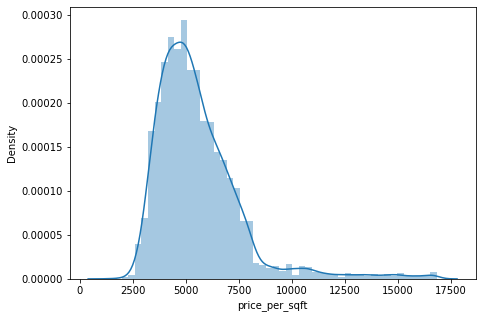

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['price_per_sqft'])

In [56]:
df3['price_per_sqft'].skew()

2.1517813931898973

In [57]:
df3['price_per_sqft'].describe()

count    10453.000000
mean      5567.123834
std       2049.476670
min       1363.636364
25%       4227.611940
50%       5147.402901
75%       6364.110589
max      16811.431774
Name: price_per_sqft, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

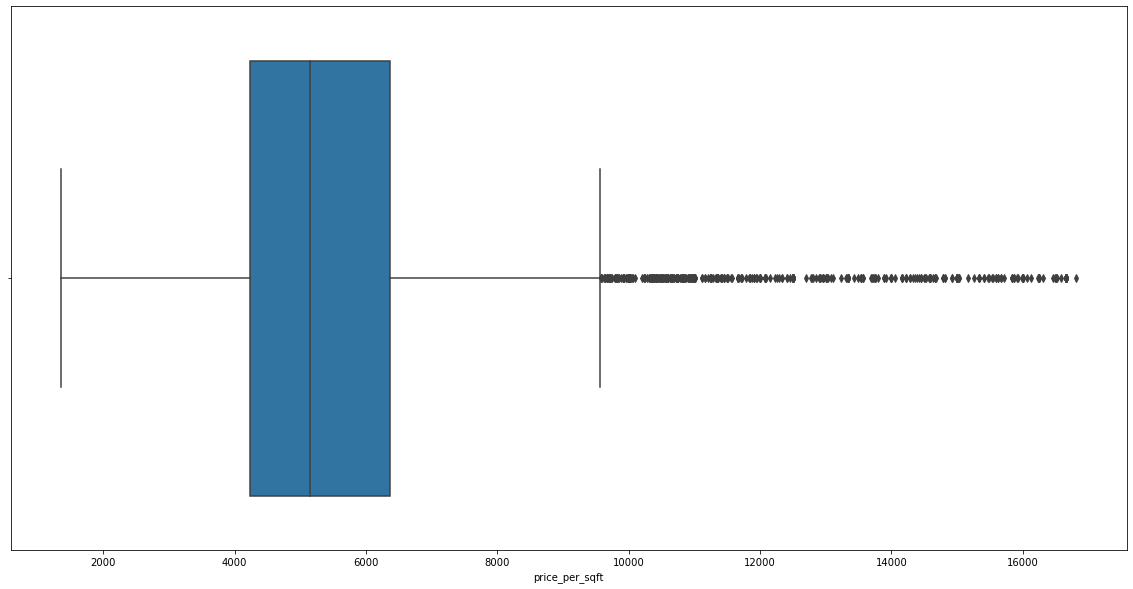

In [59]:
sns.boxplot(df3['price_per_sqft'])

In [60]:
#Finding the IQR
percentile25 = df3['price_per_sqft'].quantile(0.25)
percentile75 = df3['price_per_sqft'].quantile(0.75)

In [63]:
percentile25

4227.611940298508

In [64]:
iqr = percentile75 - percentile25

In [65]:
iqr

2136.498649164195

In [66]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [67]:
print(upper_limit)
print(lower_limit)

9568.858563208994
1022.8639665522155


In [70]:
df3[df3['price_per_sqft']>upper_limit]

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
7320,2,4200.0,4,2,420.0,4,10000.000000
7368,2,3309.0,4,3,325.0,4,9821.698398
7405,2,4046.0,4,0,445.0,4,10998.517054
7471,2,3900.0,4,2,410.0,4,10512.820513
7516,2,3329.0,3,2,330.0,3,9912.886753
...,...,...,...,...,...,...,...
10376,3,1500.0,6,2,145.0,5,9666.666667
10389,4,1650.0,3,3,175.0,3,10606.060606
10396,4,1875.0,3,1,180.0,3,9600.000000
10445,4,2100.0,3,0,210.0,4,10000.000000


In [72]:
df3[df3['price_per_sqft']<lower_limit]

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft


In [73]:
df3=df3[df3['price_per_sqft']<upper_limit]

In [74]:
df3

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1,1056.0,2,1,39.07,2,3699.810606
1,1,1521.0,3,1,95.00,3,6245.890861
2,1,1200.0,2,1,51.00,2,4250.000000
3,1,1170.0,2,1,38.00,2,3247.863248
4,1,1310.0,3,1,63.25,3,4828.244275
...,...,...,...,...,...,...,...
10447,4,1625.0,3,1,150.00,3,9230.769231
10448,4,1500.0,3,3,100.00,3,6666.666667
10449,4,1280.0,3,1,42.00,3,3281.250000
10451,4,1470.0,2,1,85.00,3,5782.312925


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

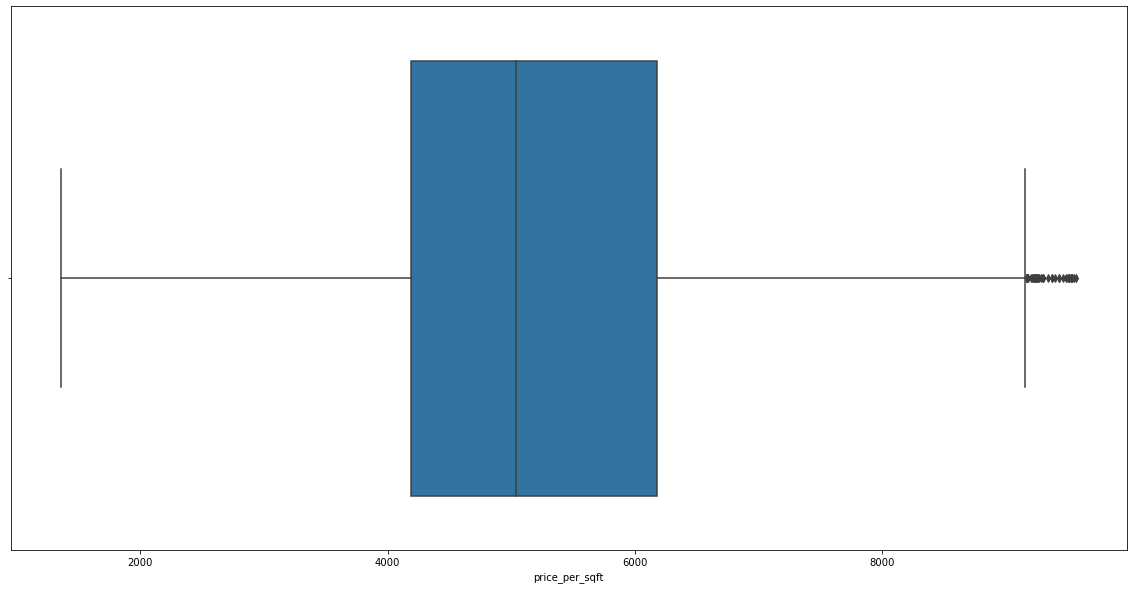

In [75]:
sns.boxplot(df3['price_per_sqft'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

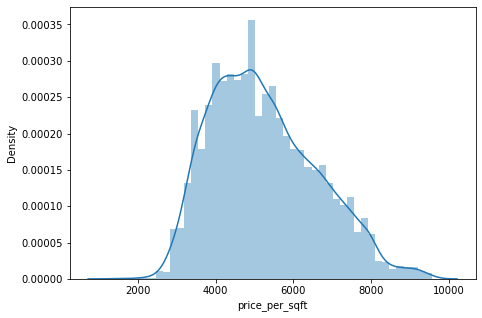

In [76]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['price_per_sqft'])

In [77]:
df3['price_per_sqft'].skew()

0.5083667541842677

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [78]:
def plot_scatter_chart(df,area_type):
    bhk2 = df[(df.area_type==area_type) & (df.bhk==2)]
    bhk3 = df[(df.area_type==area_type) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

In [79]:
def plot_scatter_chart(df,area_type):
    bhk2 = df[(df.area_type==area_type) & (df.bhk==2)]
    bhk3 = df[(df.area_type==area_type) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(area_type)
    plt.legend()

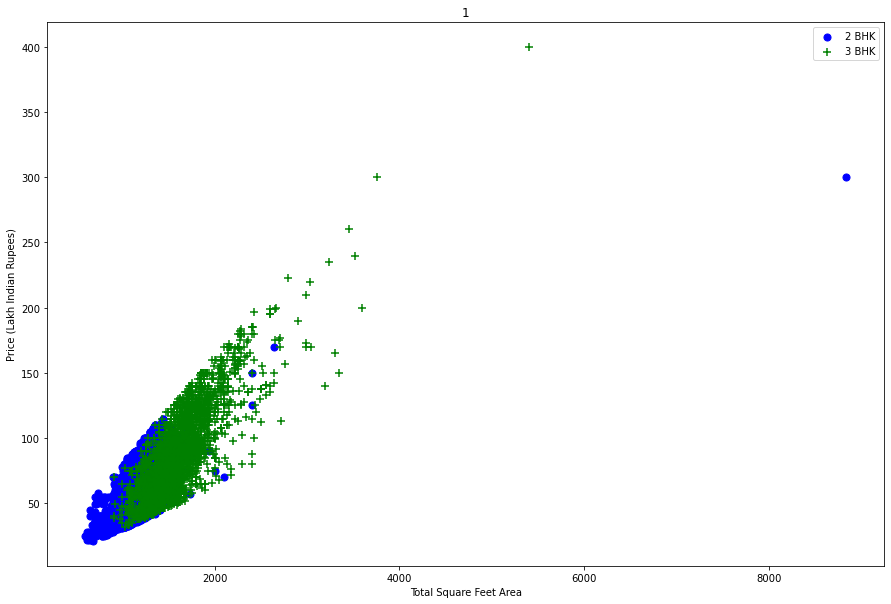

In [80]:
plot_scatter_chart(df3,1)

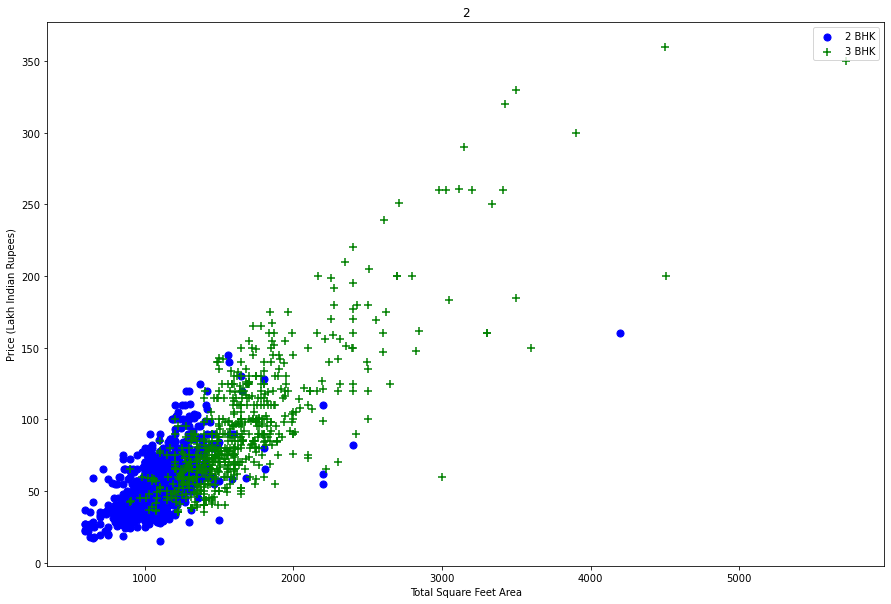

In [81]:
plot_scatter_chart(df3,2)

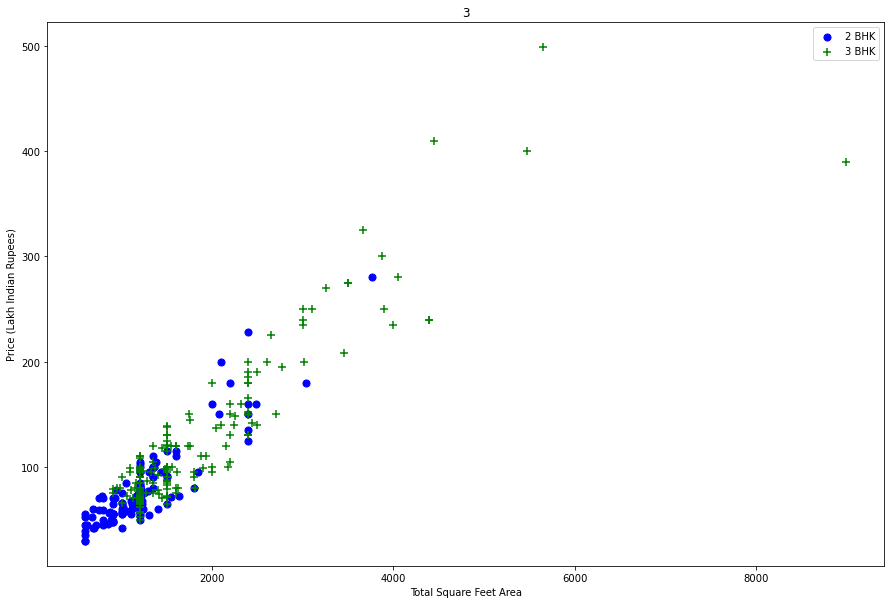

In [82]:
plot_scatter_chart(df3,3)

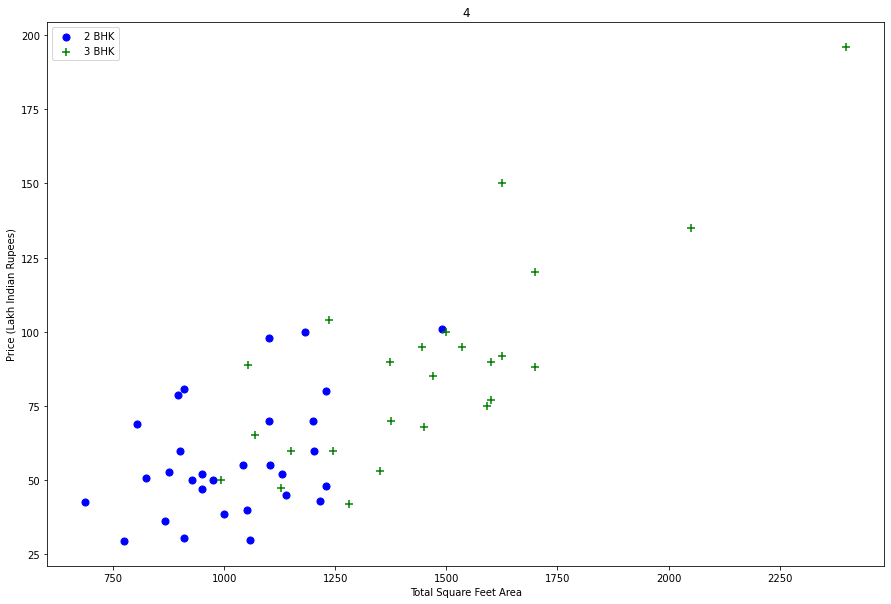

In [83]:
plot_scatter_chart(df3,4)

Text(0, 0.5, 'Count')

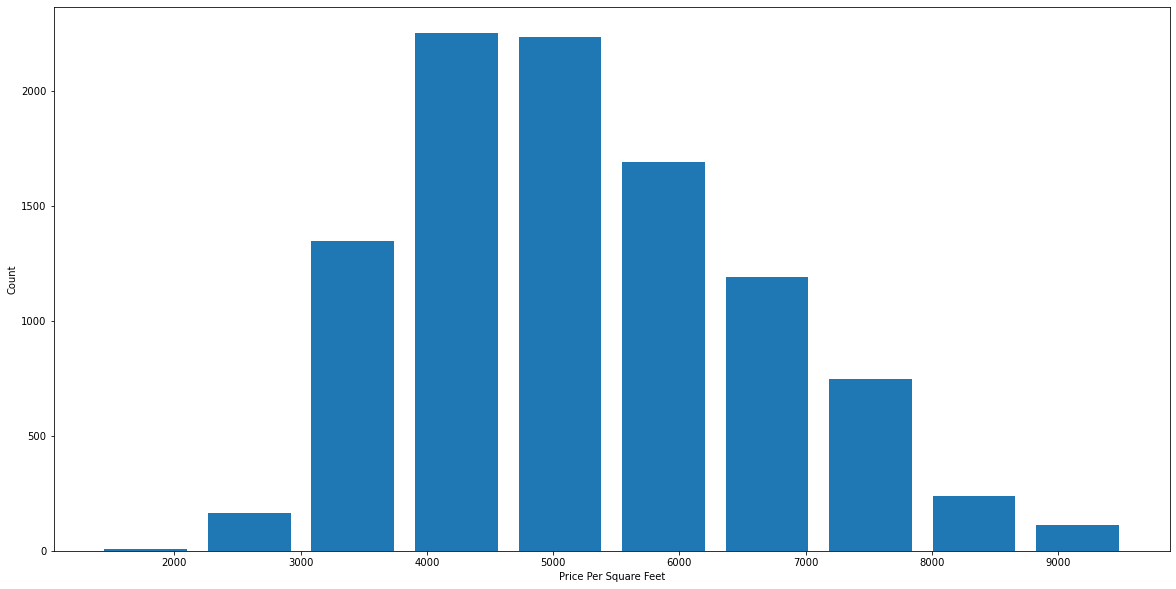

In [84]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [85]:
df3.bath.unique()

array([ 2,  3,  1,  4,  5,  7,  6,  9, 13,  8, 10])

Text(0, 0.5, 'Count')

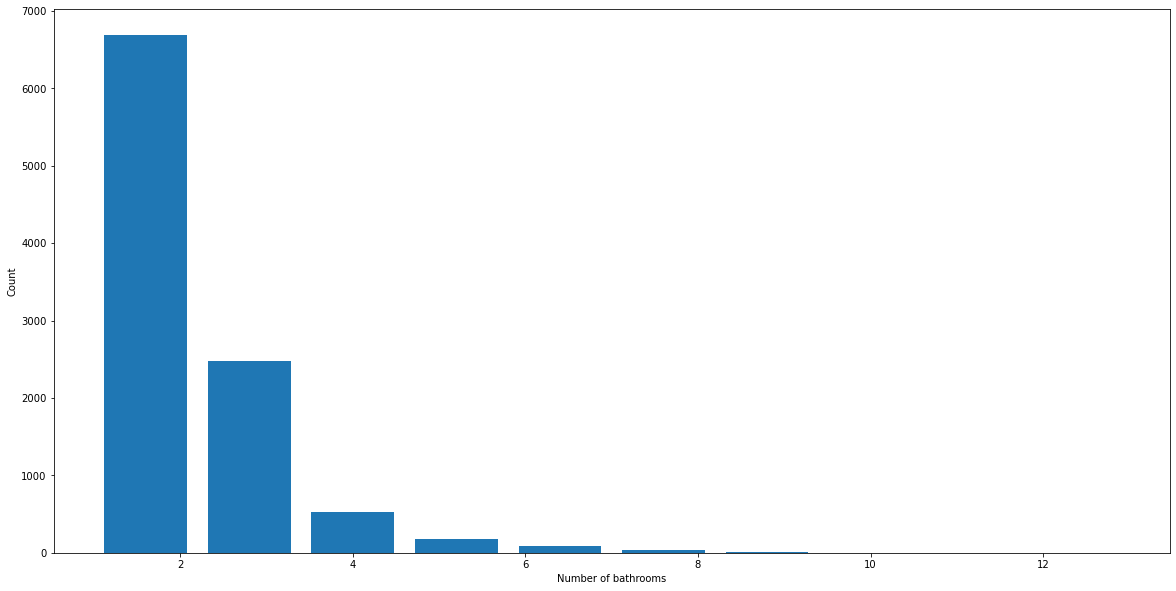

In [86]:
plt.hist(df3['bath'],rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [87]:
df3[df3.bath>df3.bhk+2]

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
6589,1,1806.0,6,2,116.0,3,6423.03433
8507,2,2460.0,7,2,80.0,4,3252.03252


In [88]:
df3.shape

(9984, 7)

In [89]:
df4=df3.copy()

In [90]:
df4.shape

(9984, 7)

In [91]:
indexdf=df4[df4.bath>df4.bhk+2].index

In [92]:
df4.drop(indexdf,inplace=True)

In [93]:
df4.shape

(9982, 7)

In [94]:
df4[df4.bath>df4.bhk+2]

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft


In [95]:
df4.corr()

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
area_type,1.000000,0.175571,0.174829,-0.156214,0.218678,0.180580,0.183693
total_sqft,0.175571,1.000000,0.686958,0.201182,0.905549,0.670012,0.246543
bath,0.174829,0.686958,1.000000,0.222762,0.638025,0.853676,0.251224
balcony,-0.156214,0.201182,0.222762,1.000000,0.161873,0.236195,-0.000560
price,0.218678,0.905549,0.638025,0.161873,1.000000,0.589750,0.586079
bhk,0.180580,0.670012,0.853676,0.236195,0.589750,1.000000,0.190258
price_per_sqft,0.183693,0.246543,0.251224,-0.000560,0.586079,0.190258,1.000000


In [96]:
df4

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1,1056.0,2,1,39.07,2,3699.810606
1,1,1521.0,3,1,95.00,3,6245.890861
2,1,1200.0,2,1,51.00,2,4250.000000
3,1,1170.0,2,1,38.00,2,3247.863248
4,1,1310.0,3,1,63.25,3,4828.244275
...,...,...,...,...,...,...,...
10447,4,1625.0,3,1,150.00,3,9230.769231
10448,4,1500.0,3,3,100.00,3,6666.666667
10449,4,1280.0,3,1,42.00,3,3281.250000
10451,4,1470.0,2,1,85.00,3,5782.312925


In [97]:
X=df4.drop(['price','price_per_sqft'],axis=1)
y=df4['price']

In [98]:
X

,area_type,total_sqft,bath,balcony,bhk
0,1,1056.0,2,1,2
1,1,1521.0,3,1,3
2,1,1200.0,2,1,2
3,1,1170.0,2,1,2
4,1,1310.0,3,1,3
...,...,...,...,...,...
10447,4,1625.0,3,1,3
10448,4,1500.0,3,3,3
10449,4,1280.0,3,1,3
10451,4,1470.0,2,1,3


In [99]:
y

0         39.07
1         95.00
2         51.00
3         38.00
4         63.25
          ...  
10447    150.00
10448    100.00
10449     42.00
10451     85.00
10452     70.00
Name: price, Length: 9982, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [101]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [102]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [103]:
lin_reg.score(X_test,y_test)

0.8015821351368462

In [104]:
from sklearn.linear_model import Lasso
las_reg = Lasso(alpha=0.1)

In [105]:
las_reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [106]:
las_reg.score(X_test,y_test)

0.8013804683076241

In [107]:
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha=0.1)

In [108]:
rid_reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [109]:
rid_reg.score(X_test,y_test)

0.8015821105235142

In [110]:
from sklearn.tree import DecisionTreeRegressor 

dec_reg = DecisionTreeRegressor(random_state = 0) 

In [111]:
params_dict = {
    'criterion':["gini", "entropy"],
    'max_depth':[1,2,3,4,5,6,7,8,10,None],
    'splitter' : ["best", "random"]
}

In [112]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dec_reg,param_grid=params_dict,cv=10,n_jobs=-1)

In [113]:
grid.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


KeyError: 'gini'

In [114]:
grid.best_estimator_

DecisionTreeRegressor(criterion='gini', max_depth=1, random_state=0)

In [115]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [116]:
grid.best_score_

nan

In [117]:
dec_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [118]:
dec_reg.score(X_test,y_test)

0.7156101046302791

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=8, max_features= 0.6, max_samples=0.75, n_estimators= 120)

In [120]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.6, max_samples=0.75,
                      n_estimators=120)

In [121]:
rf_reg.score(X_test, y_test)

0.8228756389675163

# GridSearch in RF

In [122]:
#Number of trees in random forest
n_estimators = [20,60,100,120]

#Number of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [2,8,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

In [123]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'max_samples': max_samples
}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [124]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator=rf_reg,
                      param_grid=param_grid,
                       cv=5,
                      verbose=2,
                      n_jobs=-1)

In [125]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.49967629 0.50634876 0.50910955 0.51046004 0.48681072 0.50109586
 0.50964603 0.50323928        nan        nan        nan        nan
 0.6497659  0.65087725 0.66397016 0.65297661 0.64583732 0.65625836
 0.64389308 0.6462661         nan        nan        nan        nan
 0.68230989 0.68989731 0.68647701 0.68646606 0.67047531 0.66457825
 0.67244462 0.66822045        nan        nan        nan        nan
 0.73463565 0.74809992 0.74968628 0.75091755 0.74947063 0.74890101
 0.75310064 0.74851199        nan        nan        nan        nan
 0.80042801 0.79150677 0.79521548 0.79876136 0.7959152  0.79797991
 0.79993228 0.80218713        nan        nan        nan        nan
 0.79773654 0.80370437 0.80288946 0.80045573 0.79557656 0.80714531
 0.80621836 0.80230609        nan        nan        nan        nan
 0.75269852 0.75343167 0.75681544 0.75322727 0.74738429 0.75357227

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=8, max_features=0.6,
                                             max_samples=0.75,
                                             n_estimators=120),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [126]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 1.0, 'max_samples': 0.75, 'n_estimators': 60}

In [127]:
rf_grid.best_score_

0.8071453079578841

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg = GradientBoostingRegressor(random_state=0)

In [129]:
grad_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [134]:
grad_reg.score(X_test, y_test)

0.822114819224261

### From the above conclusion, we found out that the best accuracy is found out in linear regression, random forest and gradient boost shows an average accuracy of 82%

In [131]:
lin_reg.predict(X_test)

array([ 70.66275584, 144.50924201,  67.46483332, ...,  27.36174917,
        46.44683554,  72.41727269])

In [132]:
grad_reg.predict(X_test)

array([ 69.4660874 , 145.73010219,  63.94709673, ...,  34.21294232,
        46.24183995,  74.87173685])

In [136]:
rf_reg.predict(X_test)

array([ 68.60142389, 151.51580846,  63.48366416, ...,  34.88581261,
        46.64263329,  76.60481911])

In [141]:
output_df_array = rf_reg.predict(X_test)

In [142]:
output_df = pd.Series(output_df_array)

In [144]:
output_df

0        68.601424
1       151.515808
2        63.483664
3       105.631183
4        76.658603
           ...    
2990    128.628773
2991    105.494749
2992     34.885813
2993     46.642633
2994     76.604819
Length: 2995, dtype: float64

In [148]:
output_df.to_csv('D:/Data Science Datasets/Black Friday Sale/Output_price.csv')